# Geolife Dataset

This aims at performing EDA on the geolife dataset. 

In [2]:
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import osmnx as ox
import os
import glob
from tqdm import tqdm
import numpy as np
from scipy.stats import gaussian_kde

/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_67049/3191411373.py:2: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')
/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_67049/3191411373.py:2: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')


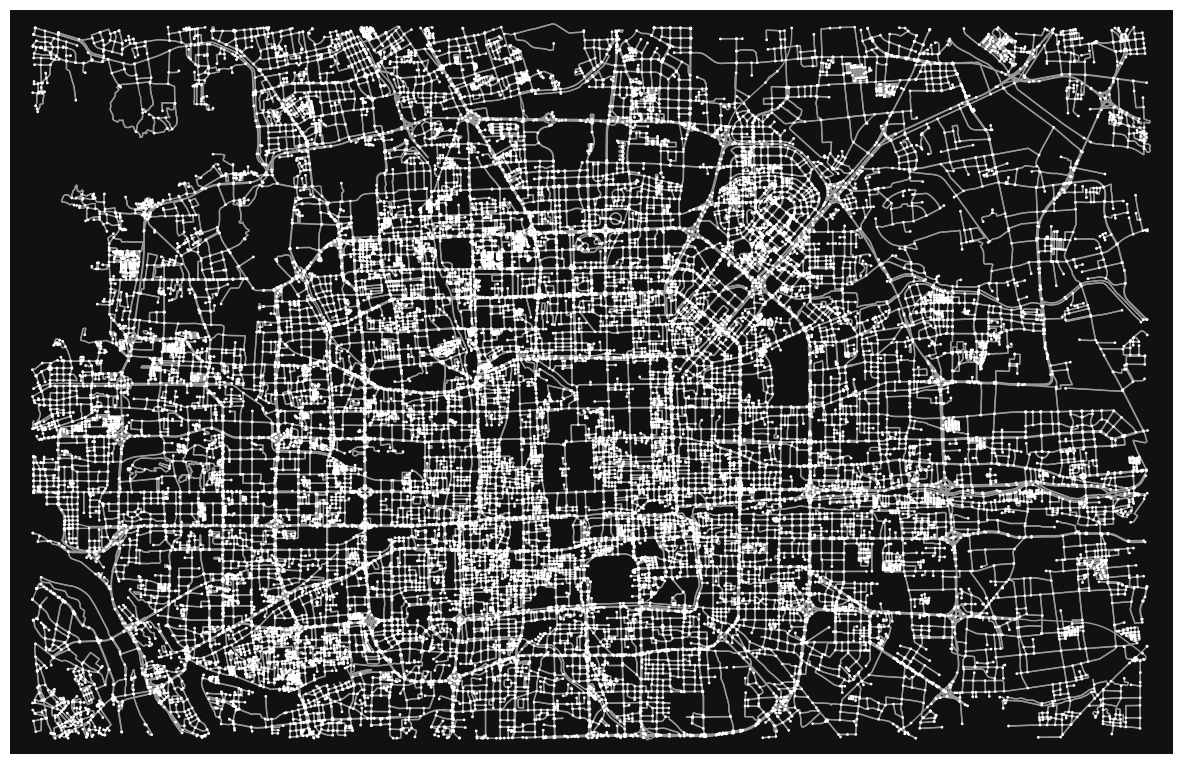

In [20]:
# Using OSMnx to download the road network of Beijing
beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')
fig, ax = ox.plot_graph(beijing_road, figsize=(15,15), show=False, close=False, node_size=4)

plt.show()

Beijing OSM vs OSMnx

<div style="text-align: center;">
    <table>
        <tr>
            <td><img src="./geolife_default.png" alt="Image 1" width="300" height="300"></td>
            <td><img src="./geolife_osm_core.png" alt="Image 1" width="300" height="300"></td>
        </tr>
    </table>
</div>

In [21]:
# Helper functions
def read_plt(plt_file):
    points = pd.read_csv(plt_file, skiprows=6, header=None)
    points.columns = ['lat', 'lon', 'none', 'alt', 'days_past', 'date', 'time']
    return points

def read_all_plt_files(driver = '000'):
    plt_files = glob.glob(f'../data/geolife/Data/{driver}/Trajectory/*.plt')
    plt_files.sort()
    df = pd.concat([read_plt(plt_file) for plt_file in plt_files])
    df['driver_id'] = driver
    return df

def read_all_plt_files_from_all_drivers():
    drivers = os.listdir(f'../data/geolife/Data/')
    drivers.sort()    
    # remove DS_Store file
    drivers = [driver for driver in drivers if driver != '.DS_Store']
    df = pd.concat([read_all_plt_files(driver) for driver in drivers])
    return df

# Example 1. Read a single plt file
# df = read_plt('../data/geolife/Data/000/Trajectory/20081023025304.plt')
# print("Lenght of the data: ", len(df))

# Example 2. Read all plt files from the directory Data/XXX/Trajectory, Represents drivr 000
# df = read_all_plt_files()
# print("Lenght of the data: ", len(df))
# print(df.head())

# Example 3. Read all plt files from the directory Data/XXX/Trajectory, Represents all drivers
# df = read_all_plt_files_from_all_drivers()
# print("Lenght of the data: ", len(df))

## Data
Let's try to understand our data and perform some LDA

The format of a single driver `XXX.txt` file is defined as such. 
- Ignore lines 1 to 6
- Field 1: Latitude in decimal degrees.
- Field 2: Longitude in decimal degrees.
- Field 3: All set to 0 for this dataset.
- Field 4: Altitude in feet (-777 if not valid).
- Field 5: Date - number of days (with fractional part) that have passed since 12/30/1899.
- Field 6: Date as a string.
- Field 7: Time as a string.


With an example.
```
         lat         lon  none  alt     days_past        date      time
0  39.984702  116.318417     0  492  39744.120185  2008-10-23  02:53:04
1  39.984683  116.318450     0  492  39744.120255  2008-10-23  02:53:10
2  39.984686  116.318417     0  492  39744.120313  2008-10-23  02:53:15
3  39.984688  116.318385     0  492  39744.120370  2008-10-23  02:53:20
4  39.984655  116.318263     0  492  39744.120428  2008-10-23  02:53:25
```


Lenght of the data:  173870


/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_67049/1776159504.py:6: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')
/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_67049/1776159504.py:6: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')


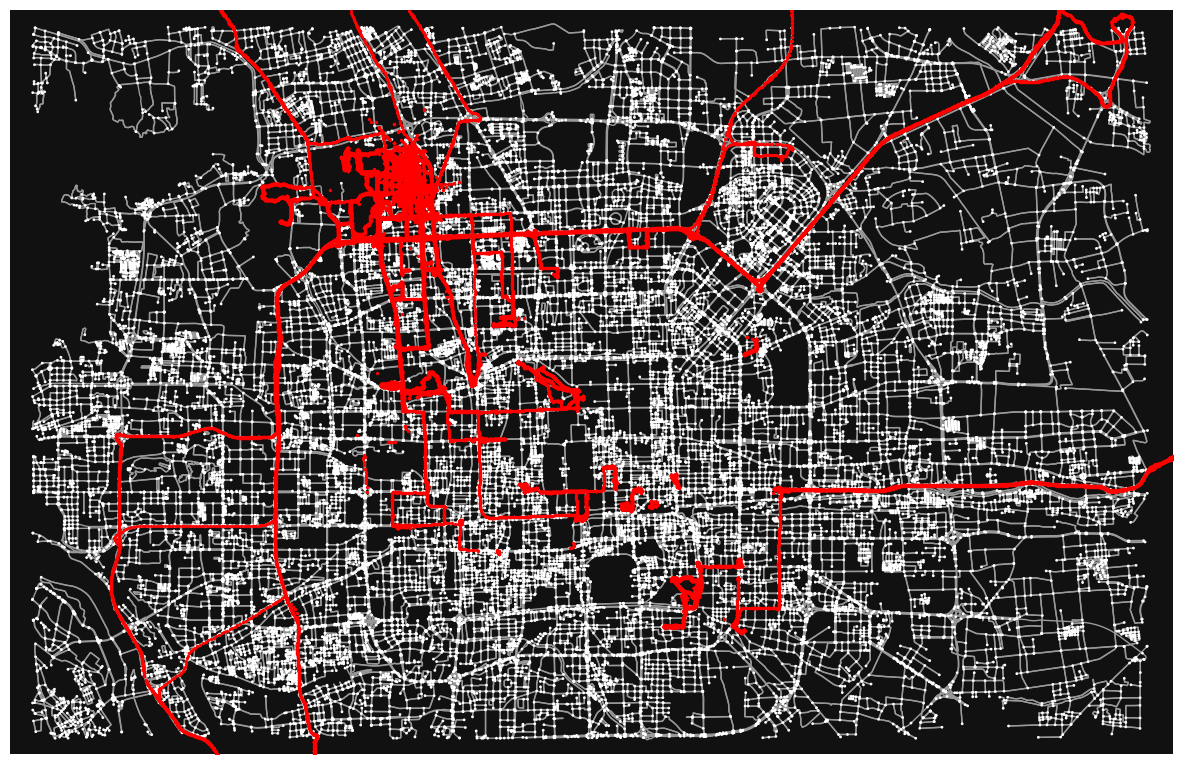

In [22]:
# Take a single driver for the example
df = read_all_plt_files()
print("Lenght of the data: ", len(df))

# OSM
beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')
fig, ax = ox.plot_graph(beijing_road, figsize=(15,15), show=False, close=False, node_size=4)
ax.scatter(df['lon'], df['lat'], c='red', s=2)

plt.show()

In [23]:
# Statistics for the data
df = read_all_plt_files_from_all_drivers()

# Drop the columns that are not needed, none, alt, days_past
df = df.drop(columns=['none', 'alt', 'days_past'])

In [ ]:
# Distribution of users by data collection period (1 week, 1 week to 1 month, 1 month to 1 year, > 1 year)

In [ ]:

# Use folium
beijing_folium = folium.Map(location=[39.9, 116.4], zoom_start=12)
HeatMap(data=df[['lat', 'lon']], radius=5).add_to(beijing_folium)
# beijing_folium.save('beijing.html')
# Save the plot

# plt.show()

### Characteristics
- Trip Length
- Trip Distance

### Spatial Heatmaps
Heatmaps can help us decipher GPS density. We can look at
1. Random Sample?
2. Part of Day (AM / PM)
3. 